In [5]:
import pandas as pd
iris=pd.read_csv("iris_data.txt", sep="\t") #me descargo el txt, como esta separados por cambios de linea, lo separo por tabulacion y lo guardo en un dataframe
iris.head() #miro los 1ros 5 de la tabla

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


 #trabajar con los datos, analizarlos y poder encontrar patrones que nos permitan derivar información
 #el aprendizaje automático consiste en identificar de patrones o tendencias que de los datos de forma automática.
 #buscar patrones "ocultos" en los datos sin la necesidad de contar con la información sobre la verdadera clasificación (etiquetas) de los datos. Son métodos exploratorios que agrupan los datos según similitud para simplificar su análisis.
 #observaciones que están dentro de un mismo grupo, son similares entre ellas y distintas a las de otros grupos
 #métodos de clustering requieren de la definición y cuantificación de la similitud entre las observaciones->necesario revisar el concepto de distancia, ya que es lo que se usa como medida de similitud o diferencia entre grupos.

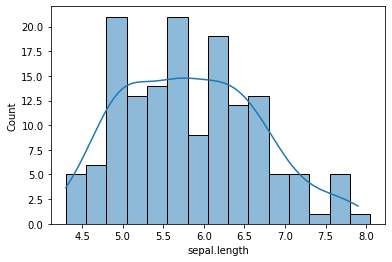

In [19]:
#para graficar la distribución de frecuencias de las distintas variables ->#saber si las observaciones son únicas o se repiten
import seaborn as sns 
import matplotlib.pyplot as plt

sns.histplot(data=iris, x="sepal.length", binwidth=0.25, kde=True)
#Data=nombre de df x = nombre de columna a analizar #bindwth:altura de barritas #Kde= estimador de densidad (la linea azul)

plt.show()
#aca ya vimos como se comporta las variables

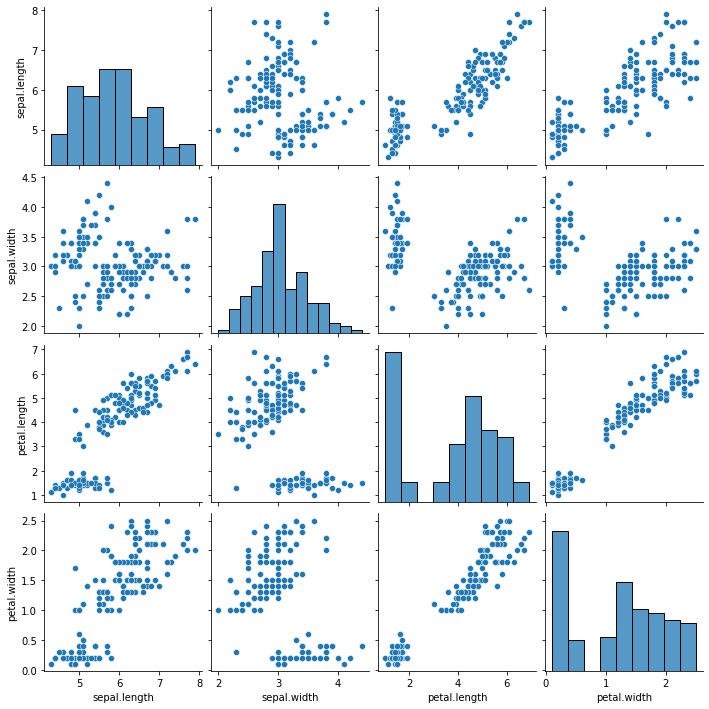

In [20]:
#correlacion(si cambia un dato cambia el otro)->en grafico

#aux:asociaciones entre las mismas (correlación). De este modo sabremos si el comportamiento (crecimiento o disminución) de una variable, se debe o está influenciada por otra

import seaborn as sns

g = sns.pairplot(iris) #con pairplot podemos entonces estudiar si existen correlaciones entre las variables

aux:
calculo de distancias:
Una forma de obtener la similitud es asumir que los datos son puntos en el espacio->si se define la distancia ente los puntos y se mide la separación entre dos registros->podrá obtenerse la similitud entre estos.
aux:Una de las formas más básicas para calcular la distancia entre dos puntos es la Euclídea, basada en el famoso Teorema de Pitágoras.

Normalizado y escalado de los datos:
Escaleado:es un procedimiento nos permite asegurarnos de que aún cuando algunas variables toman valores más grandes no se usarán como predictor principal a la hora de clasificar.
Escalar los datos le da a todas las características la misma importancia para que ninguna esté dominada por otra.
Normalización:implica transformar o convertir el conjunto de datos en una distribución normal->todos datos tenga una varianza del mismo orden. Cada dato nos dará una idea de a cuántos desvíos de la media está ese punto.

In [21]:
from sklearn.preprocessing import StandardScaler #clase StandardScaler ->del módulo scikitlearn
scaler=StandardScaler()
iris_escaleado=scaler.fit_transform(iris)

K-means:método para agrupar nuestros datos->agrupa las observaciones en los mejores K grupos distintos, es decirlos k clusters con la menor varianza interna posible
auxeparten las observaciones en K clusters de forma que la suma de las varianzas internas de todos ellos sea lo menor posible
Pasos:
#Especifica el número K de clusters que se quieren crear
#Selecciona de forma aleatoria k observaciones del set de datos como centroides iniciales, esto es los datos a los cuáles se calcula la distancia para delimitar el grupo de menor varianza interna
#Calcula las distancia de todos los datos al centroide, para definir a cuál se encuentra más próximo
#Para cada uno de los K clusters recalcular su centroide, la posición del centroide se actualiza tomando como nuevo centroide la posición del promedio de las observaciones pertenecientes a dicho grupo
#Repite los pasos 3 y 4 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada paso, o se alcancen el número de iteraciones definidas de antemano.

In [22]:
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans

k = 3  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones
kmeans.fit(iris_escaleado)  #aplicamos el método a nuestros datos

KMeans(init='random', n_clusters=3, random_state=123457)

In [23]:
from sklearn.preprocessing import StandardScaler

k=3 
kmeans=KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(iris_escaleado)

KMeans(init='random', n_clusters=3, random_state=123457)

In [24]:
print(kmeans.labels_)#dato de a q grupo pertenece

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [26]:
print(kmeans.cluster_centers_)#posicion de los centroides

[[-0.06881714 -0.89036741  0.34501443  0.28492552]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13140499  0.08716178  0.98548265  0.99875633]]


In [2]:
from scipy import stats

In [9]:
w, p =stats.shapiro(iris["sepal.width"])

In [10]:
p #Si valor de p>0.05 es normal

0.0751834362745285

In [27]:
iris_escaleado #lista de otras listas : cada posicion en cada lista se corresponde con cada columna


array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [28]:
iris_escaleado[:,2]#para obtener datos de una columna ->lista completa de principio a fin pero q solo tome valores (de todos los datos solo pide la posicion 2 de casa lista por eso el “:,”)

array([-1.3412724 , -1.3412724 , -1.39813811, -1.2844067 , -1.3412724 ,
       -1.17067529, -1.3412724 , -1.2844067 , -1.3412724 , -1.2844067 ,
       -1.2844067 , -1.227541  , -1.3412724 , -1.51186952, -1.45500381,
       -1.2844067 , -1.39813811, -1.3412724 , -1.17067529, -1.2844067 ,
       -1.17067529, -1.2844067 , -1.56873522, -1.17067529, -1.05694388,
       -1.227541  , -1.227541  , -1.2844067 , -1.3412724 , -1.227541  ,
       -1.227541  , -1.2844067 , -1.2844067 , -1.3412724 , -1.2844067 ,
       -1.45500381, -1.39813811, -1.2844067 , -1.39813811, -1.2844067 ,
       -1.39813811, -1.39813811, -1.39813811, -1.227541  , -1.05694388,
       -1.3412724 , -1.227541  , -1.3412724 , -1.2844067 , -1.3412724 ,
        0.53529583,  0.42156442,  0.64902723,  0.1372359 ,  0.47843012,
        0.42156442,  0.53529583, -0.26082403,  0.47843012,  0.08037019,
       -0.14709262,  0.25096731,  0.1372359 ,  0.53529583, -0.09022692,
        0.36469871,  0.42156442,  0.1941016 ,  0.42156442,  0.08

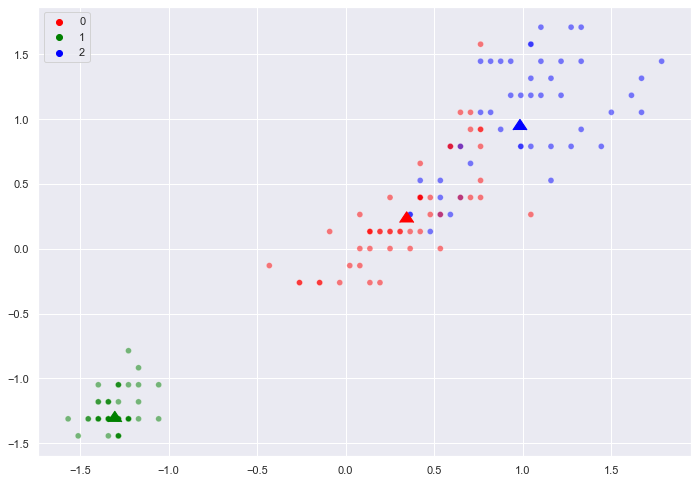

In [31]:
import seaborn as sns
colores = ["red", "green", "blue"]#Colores
g=sns.set(rc={"figure.figsize":(11.7,8.27)}) #Tamaño (esto lo agrego guille)
g = sns.scatterplot(x = iris_escaleado[:,2], y = iris_escaleado[:, 3], hue = kmeans.labels_, palette = colores, alpha = 0.5) #Grafica puntos
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette = colores, hue = [0, 1, 2], legend = False, marker=6, s=200) #Pone centroides en el gráfico (traingulos que muestran las distancias)


In [32]:
print(kmeans.inertia_ ) #hasta aca no sabemos si esa inercia es confiable o no, para ello debemos hacer grafico y iri comparando

140.96837895511075


In [33]:
#Voy calculando kmeans de cada grupo:
inercias={}
def inercias_por_k(diccionario):
    for i in range(1,11):
        kmeans=KMeans(n_clusters=i, init="random", n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(iris_escaleado)
        diccionario[i]=kmeans.inertia_

inercias_por_k(inercias)

inercias

#me devuelve:En diccio para cada grupo su valor de inercia aux: Grafico valor de inercia por cantidad de grupos que tenemos



{1: 600.0,
 2: 223.73200573676345,
 3: 140.96837895511075,
 4: 114.42970777082232,
 5: 91.15436807797663,
 6: 82.00448142316834,
 7: 72.65522408358467,
 8: 63.056244057155496,
 9: 54.960332063567414,
 10: 47.640624864060996}

In [34]:
#Auxiliar:
df_inercias=pd.DataFrame(inercias.items(), columns=["k", "inercia"])
df_inercias

,k,inercia
0,1,600.000000
1,2,223.732006
2,3,140.968379
3,4,114.429708
4,5,91.154368
5,6,82.004481
6,7,72.655224
7,8,63.056244
8,9,54.960332
9,10,47.640625


<AxesSubplot:xlabel='k', ylabel='inercia'>

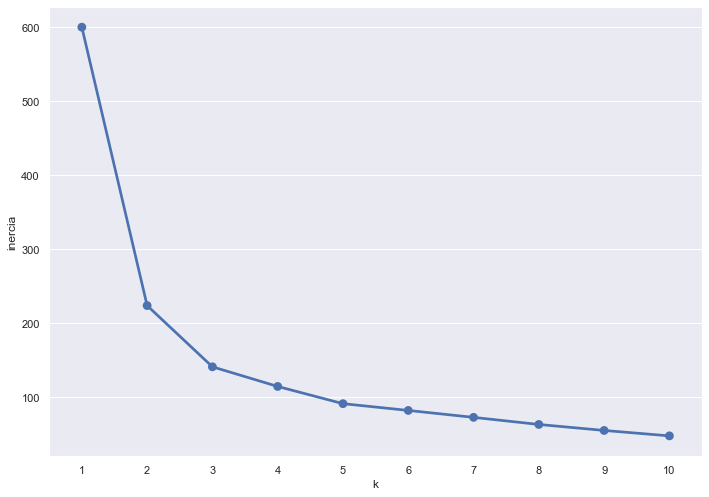

In [36]:
#Grafico mas importante para saber bien interpretar inercias
sns.pointplot(data=df_inercias, x="k", y="inercia") 

In [37]:
#otro grafico nos dice si nuestros datos son confiables o no 
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [40]:
#Para generar el gráfico:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

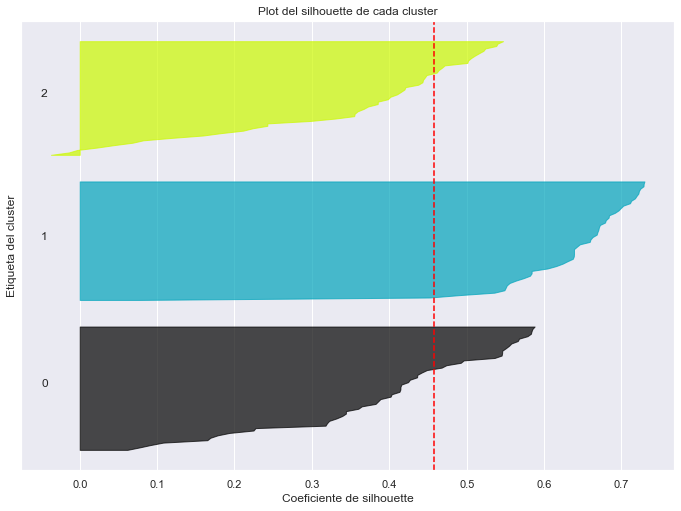

In [41]:
#Para visualizar el grafico:
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)
#aca voy a ver los 3 grupos (el 0, 1 y 2 ) me tengo que ir fijando si esta + cerca de 1 o -1